## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  86.499393  1090.618424  0.135381  10.541852  1.111677
1  65.923527   739.508317  0.565501   4.308761  1.376101
2  76.767855  1380.305351  0.396385  10.398151  1.420090
3   7.796444   962.437142  0.055894   7.046614  1.335254
4  85.082609   345.852913  0.147613   3.191345  0.405713


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.46114 | train_mse: 3.77471 | train_mae: 1.38133 |  0:00:00s
epoch 1  | loss: 0.93065 | train_mse: 2.81456 | train_mae: 1.16633 |  0:00:00s
epoch 2  | loss: 0.75993 | train_mse: 1.55458 | train_mae: 0.82115 |  0:00:00s


epoch 3  | loss: 0.67625 | train_mse: 1.29616 | train_mae: 0.85203 |  0:00:00s
epoch 4  | loss: 0.3886  | train_mse: 2.03605 | train_mae: 1.0213  |  0:00:00s
epoch 5  | loss: 0.54467 | train_mse: 1.5115  | train_mae: 0.90566 |  0:00:00s
epoch 6  | loss: 0.44983 | train_mse: 1.35675 | train_mae: 0.84335 |  0:00:00s


epoch 7  | loss: 0.39936 | train_mse: 1.4756  | train_mae: 0.79787 |  0:00:00s
epoch 8  | loss: 0.41183 | train_mse: 1.23652 | train_mae: 0.73796 |  0:00:00s
epoch 9  | loss: 0.37665 | train_mse: 0.95794 | train_mae: 0.67512 |  0:00:00s


epoch 10 | loss: 0.29663 | train_mse: 0.69209 | train_mae: 0.56128 |  0:00:00s
epoch 11 | loss: 0.24425 | train_mse: 0.63265 | train_mae: 0.52121 |  0:00:00s
epoch 12 | loss: 0.42158 | train_mse: 0.65435 | train_mae: 0.53892 |  0:00:01s


epoch 13 | loss: 0.26159 | train_mse: 0.5559  | train_mae: 0.49598 |  0:00:01s
epoch 14 | loss: 0.2903  | train_mse: 0.58    | train_mae: 0.50021 |  0:00:01s
epoch 15 | loss: 0.2564  | train_mse: 0.44817 | train_mae: 0.44989 |  0:00:01s


epoch 16 | loss: 0.15521 | train_mse: 0.41195 | train_mae: 0.42513 |  0:00:01s
epoch 17 | loss: 0.22745 | train_mse: 0.46329 | train_mae: 0.45277 |  0:00:01s
epoch 18 | loss: 0.18485 | train_mse: 0.52891 | train_mae: 0.48147 |  0:00:01s
epoch 19 | loss: 0.21731 | train_mse: 0.46411 | train_mae: 0.45885 |  0:00:01s


epoch 20 | loss: 0.17035 | train_mse: 0.26855 | train_mae: 0.37427 |  0:00:01s
epoch 21 | loss: 0.26091 | train_mse: 0.21605 | train_mae: 0.32224 |  0:00:01s
epoch 22 | loss: 0.25047 | train_mse: 0.25067 | train_mae: 0.35285 |  0:00:01s


epoch 23 | loss: 0.16037 | train_mse: 0.19012 | train_mae: 0.31142 |  0:00:01s
epoch 24 | loss: 0.16301 | train_mse: 0.15727 | train_mae: 0.28156 |  0:00:01s
epoch 25 | loss: 0.25931 | train_mse: 0.21495 | train_mae: 0.33371 |  0:00:01s


epoch 26 | loss: 0.28663 | train_mse: 0.21756 | train_mae: 0.34831 |  0:00:02s
epoch 27 | loss: 0.22795 | train_mse: 0.12762 | train_mae: 0.26848 |  0:00:02s
epoch 28 | loss: 0.34017 | train_mse: 0.2299  | train_mae: 0.30012 |  0:00:02s
epoch 29 | loss: 0.28326 | train_mse: 0.23371 | train_mae: 0.29993 |  0:00:02s


epoch 30 | loss: 0.33631 | train_mse: 0.2117  | train_mae: 0.30454 |  0:00:02s
epoch 31 | loss: 0.28512 | train_mse: 0.23109 | train_mae: 0.32532 |  0:00:02s
epoch 32 | loss: 0.28587 | train_mse: 0.2668  | train_mae: 0.36231 |  0:00:02s


epoch 33 | loss: 0.24946 | train_mse: 0.19581 | train_mae: 0.31678 |  0:00:02s
epoch 34 | loss: 0.18575 | train_mse: 0.18645 | train_mae: 0.28648 |  0:00:02s
epoch 35 | loss: 0.14549 | train_mse: 0.14619 | train_mae: 0.26235 |  0:00:02s
epoch 36 | loss: 0.17716 | train_mse: 0.14127 | train_mae: 0.27653 |  0:00:02s


epoch 37 | loss: 0.12713 | train_mse: 0.12964 | train_mae: 0.27266 |  0:00:02s
epoch 38 | loss: 0.21774 | train_mse: 0.21127 | train_mae: 0.27487 |  0:00:02s
epoch 39 | loss: 0.11892 | train_mse: 0.16905 | train_mae: 0.26721 |  0:00:02s
epoch 40 | loss: 0.15908 | train_mse: 0.15804 | train_mae: 0.27895 |  0:00:03s


epoch 41 | loss: 0.11473 | train_mse: 0.22608 | train_mae: 0.30254 |  0:00:03s
epoch 42 | loss: 0.34931 | train_mse: 0.26001 | train_mae: 0.31409 |  0:00:03s


epoch 43 | loss: 0.3093  | train_mse: 0.30204 | train_mae: 0.34264 |  0:00:03s
epoch 44 | loss: 0.22447 | train_mse: 0.25132 | train_mae: 0.32288 |  0:00:03s


epoch 45 | loss: 0.22077 | train_mse: 0.22268 | train_mae: 0.33122 |  0:00:03s
epoch 46 | loss: 0.16931 | train_mse: 0.20476 | train_mae: 0.31028 |  0:00:03s


epoch 47 | loss: 0.22847 | train_mse: 0.17492 | train_mae: 0.27304 |  0:00:03s


epoch 48 | loss: 0.20765 | train_mse: 0.16214 | train_mae: 0.2558  |  0:00:04s


epoch 49 | loss: 0.1145  | train_mse: 0.10553 | train_mae: 0.22161 |  0:00:04s


epoch 50 | loss: 0.12022 | train_mse: 0.18633 | train_mae: 0.25398 |  0:00:04s
epoch 51 | loss: 0.11161 | train_mse: 0.22113 | train_mae: 0.27546 |  0:00:04s


epoch 52 | loss: 0.11104 | train_mse: 0.22986 | train_mae: 0.27516 |  0:00:05s


epoch 53 | loss: 0.18269 | train_mse: 0.26768 | train_mae: 0.29657 |  0:00:05s


epoch 54 | loss: 0.23369 | train_mse: 0.24131 | train_mae: 0.29893 |  0:00:05s
epoch 55 | loss: 0.14592 | train_mse: 0.11895 | train_mae: 0.24707 |  0:00:05s


epoch 56 | loss: 0.13935 | train_mse: 0.09039 | train_mae: 0.22359 |  0:00:05s
epoch 57 | loss: 0.12995 | train_mse: 0.13749 | train_mae: 0.25068 |  0:00:06s


epoch 58 | loss: 0.12577 | train_mse: 0.20721 | train_mae: 0.28515 |  0:00:06s


epoch 59 | loss: 0.15996 | train_mse: 0.14418 | train_mae: 0.27449 |  0:00:06s
epoch 60 | loss: 0.32745 | train_mse: 0.11612 | train_mae: 0.24519 |  0:00:06s


epoch 61 | loss: 0.0777  | train_mse: 0.09639 | train_mae: 0.22891 |  0:00:06s
epoch 62 | loss: 0.1324  | train_mse: 0.10007 | train_mae: 0.23744 |  0:00:06s


epoch 63 | loss: 0.14976 | train_mse: 0.08117 | train_mae: 0.2154  |  0:00:07s
epoch 64 | loss: 0.18493 | train_mse: 0.12625 | train_mae: 0.26958 |  0:00:07s


epoch 65 | loss: 0.13006 | train_mse: 0.18966 | train_mae: 0.30035 |  0:00:07s
epoch 66 | loss: 0.13124 | train_mse: 0.12959 | train_mae: 0.26088 |  0:00:07s


epoch 67 | loss: 0.17354 | train_mse: 0.08006 | train_mae: 0.22412 |  0:00:07s
epoch 68 | loss: 0.09506 | train_mse: 0.0649  | train_mae: 0.19692 |  0:00:08s


epoch 69 | loss: 0.21311 | train_mse: 0.0759  | train_mae: 0.2003  |  0:00:08s
epoch 70 | loss: 0.10046 | train_mse: 0.08083 | train_mae: 0.21734 |  0:00:08s


epoch 71 | loss: 0.09398 | train_mse: 0.0709  | train_mae: 0.21424 |  0:00:08s


epoch 72 | loss: 0.31204 | train_mse: 0.08649 | train_mae: 0.23089 |  0:00:08s
epoch 73 | loss: 0.12997 | train_mse: 0.08632 | train_mae: 0.22004 |  0:00:09s


epoch 74 | loss: 0.18191 | train_mse: 0.06578 | train_mae: 0.19966 |  0:00:09s


epoch 75 | loss: 0.13043 | train_mse: 0.06184 | train_mae: 0.19306 |  0:00:09s


epoch 76 | loss: 0.06797 | train_mse: 0.05905 | train_mae: 0.18962 |  0:00:10s
epoch 77 | loss: 0.11787 | train_mse: 0.06218 | train_mae: 0.19925 |  0:00:10s


epoch 78 | loss: 0.13588 | train_mse: 0.08069 | train_mae: 0.22223 |  0:00:10s
epoch 79 | loss: 0.13101 | train_mse: 0.07744 | train_mae: 0.2094  |  0:00:10s


epoch 80 | loss: 0.11745 | train_mse: 0.05524 | train_mae: 0.18834 |  0:00:10s
epoch 81 | loss: 0.08705 | train_mse: 0.05885 | train_mae: 0.18545 |  0:00:10s


epoch 82 | loss: 0.09923 | train_mse: 0.07014 | train_mae: 0.20192 |  0:00:11s
epoch 83 | loss: 0.08794 | train_mse: 0.07278 | train_mae: 0.21022 |  0:00:11s


epoch 84 | loss: 0.0651  | train_mse: 0.10556 | train_mae: 0.25819 |  0:00:11s
epoch 85 | loss: 0.10356 | train_mse: 0.11024 | train_mae: 0.25534 |  0:00:11s


epoch 86 | loss: 0.10406 | train_mse: 0.07735 | train_mae: 0.21266 |  0:00:11s
epoch 87 | loss: 0.09185 | train_mse: 0.06322 | train_mae: 0.19145 |  0:00:11s


epoch 88 | loss: 0.08711 | train_mse: 0.06484 | train_mae: 0.19294 |  0:00:11s
epoch 89 | loss: 0.09597 | train_mse: 0.09591 | train_mae: 0.22494 |  0:00:12s


epoch 90 | loss: 0.12479 | train_mse: 0.10609 | train_mae: 0.23176 |  0:00:12s
epoch 91 | loss: 0.13072 | train_mse: 0.08031 | train_mae: 0.21154 |  0:00:12s


epoch 92 | loss: 0.12915 | train_mse: 0.09201 | train_mae: 0.22095 |  0:00:12s
epoch 93 | loss: 0.2058  | train_mse: 0.08921 | train_mae: 0.2188  |  0:00:12s


epoch 94 | loss: 0.07819 | train_mse: 0.12849 | train_mae: 0.24615 |  0:00:12s
epoch 95 | loss: 0.10199 | train_mse: 0.1817  | train_mae: 0.27532 |  0:00:12s


epoch 96 | loss: 0.13116 | train_mse: 0.15265 | train_mae: 0.27247 |  0:00:12s
epoch 97 | loss: 0.12767 | train_mse: 0.09137 | train_mae: 0.22213 |  0:00:13s


epoch 98 | loss: 0.14867 | train_mse: 0.08329 | train_mae: 0.20898 |  0:00:13s
epoch 99 | loss: 0.22044 | train_mse: 0.08754 | train_mae: 0.21108 |  0:00:13s


epoch 100| loss: 0.13107 | train_mse: 0.12748 | train_mae: 0.22328 |  0:00:13s
epoch 101| loss: 0.07905 | train_mse: 0.16205 | train_mae: 0.25906 |  0:00:13s
epoch 102| loss: 0.19758 | train_mse: 0.17535 | train_mae: 0.28175 |  0:00:13s


epoch 103| loss: 0.08116 | train_mse: 0.11058 | train_mae: 0.24023 |  0:00:13s
epoch 104| loss: 0.06899 | train_mse: 0.06978 | train_mae: 0.19989 |  0:00:13s
epoch 105| loss: 0.14834 | train_mse: 0.04842 | train_mae: 0.17253 |  0:00:13s


epoch 106| loss: 0.08255 | train_mse: 0.06751 | train_mae: 0.19256 |  0:00:13s
epoch 107| loss: 0.1083  | train_mse: 0.07352 | train_mae: 0.19749 |  0:00:14s
epoch 108| loss: 0.09057 | train_mse: 0.0968  | train_mae: 0.21901 |  0:00:14s


epoch 109| loss: 0.06713 | train_mse: 0.08268 | train_mae: 0.20473 |  0:00:14s
epoch 110| loss: 0.21171 | train_mse: 0.06541 | train_mae: 0.19637 |  0:00:14s


epoch 111| loss: 0.1148  | train_mse: 0.06821 | train_mae: 0.20049 |  0:00:14s
epoch 112| loss: 0.08695 | train_mse: 0.06494 | train_mae: 0.19406 |  0:00:14s
epoch 113| loss: 0.16224 | train_mse: 0.05313 | train_mae: 0.17411 |  0:00:14s


epoch 114| loss: 0.10663 | train_mse: 0.06362 | train_mae: 0.18437 |  0:00:14s
epoch 115| loss: 0.14192 | train_mse: 0.07371 | train_mae: 0.19428 |  0:00:14s
epoch 116| loss: 0.06544 | train_mse: 0.07251 | train_mae: 0.20404 |  0:00:14s


epoch 117| loss: 0.09554 | train_mse: 0.05464 | train_mae: 0.17943 |  0:00:15s
epoch 118| loss: 0.07815 | train_mse: 0.04637 | train_mae: 0.16491 |  0:00:15s
epoch 119| loss: 0.06137 | train_mse: 0.05232 | train_mae: 0.16715 |  0:00:15s


epoch 120| loss: 0.11452 | train_mse: 0.07515 | train_mae: 0.18945 |  0:00:15s
epoch 121| loss: 0.09525 | train_mse: 0.09173 | train_mae: 0.19614 |  0:00:15s


epoch 122| loss: 0.15283 | train_mse: 0.09908 | train_mae: 0.21413 |  0:00:15s
epoch 123| loss: 0.12411 | train_mse: 0.13036 | train_mae: 0.24656 |  0:00:15s
epoch 124| loss: 0.1208  | train_mse: 0.11493 | train_mae: 0.23623 |  0:00:15s


epoch 125| loss: 0.12675 | train_mse: 0.07265 | train_mae: 0.20375 |  0:00:15s
epoch 126| loss: 0.09855 | train_mse: 0.05418 | train_mae: 0.18472 |  0:00:16s


epoch 127| loss: 0.13114 | train_mse: 0.04956 | train_mae: 0.18302 |  0:00:16s


epoch 128| loss: 0.09721 | train_mse: 0.0567  | train_mae: 0.19002 |  0:00:16s


epoch 129| loss: 0.11716 | train_mse: 0.07837 | train_mae: 0.21935 |  0:00:17s


epoch 130| loss: 0.08338 | train_mse: 0.06236 | train_mae: 0.19504 |  0:00:17s
epoch 131| loss: 0.08492 | train_mse: 0.05385 | train_mae: 0.19159 |  0:00:17s


epoch 132| loss: 0.07372 | train_mse: 0.0687  | train_mae: 0.19912 |  0:00:17s
epoch 133| loss: 0.10594 | train_mse: 0.04637 | train_mae: 0.17314 |  0:00:18s


epoch 134| loss: 0.11059 | train_mse: 0.05832 | train_mae: 0.1893  |  0:00:18s


epoch 135| loss: 0.06976 | train_mse: 0.04935 | train_mae: 0.1798  |  0:00:18s


epoch 136| loss: 0.07916 | train_mse: 0.05418 | train_mae: 0.18929 |  0:00:19s
epoch 137| loss: 0.08358 | train_mse: 0.05568 | train_mae: 0.19136 |  0:00:19s


epoch 138| loss: 0.08162 | train_mse: 0.05421 | train_mae: 0.19024 |  0:00:19s
epoch 139| loss: 0.26309 | train_mse: 0.06265 | train_mae: 0.2032  |  0:00:19s


epoch 140| loss: 0.2014  | train_mse: 0.07291 | train_mae: 0.21478 |  0:00:19s


epoch 141| loss: 0.07463 | train_mse: 0.05845 | train_mae: 0.19678 |  0:00:20s


epoch 142| loss: 0.09176 | train_mse: 0.077   | train_mae: 0.22148 |  0:00:20s


epoch 143| loss: 0.09272 | train_mse: 0.0675  | train_mae: 0.20108 |  0:00:20s
epoch 144| loss: 0.10195 | train_mse: 0.07016 | train_mae: 0.2046  |  0:00:20s


epoch 145| loss: 0.16876 | train_mse: 0.07425 | train_mae: 0.20746 |  0:00:20s
epoch 146| loss: 0.07879 | train_mse: 0.06238 | train_mae: 0.19124 |  0:00:20s


epoch 147| loss: 0.13789 | train_mse: 0.05705 | train_mae: 0.18518 |  0:00:21s
epoch 148| loss: 0.22379 | train_mse: 0.11187 | train_mae: 0.23118 |  0:00:21s


epoch 149| loss: 0.12952 | train_mse: 0.09484 | train_mae: 0.22481 |  0:00:21s
epoch 150| loss: 0.09595 | train_mse: 0.07165 | train_mae: 0.2096  |  0:00:21s


epoch 151| loss: 0.09201 | train_mse: 0.09818 | train_mae: 0.22136 |  0:00:21s
epoch 152| loss: 0.06645 | train_mse: 0.11954 | train_mae: 0.22506 |  0:00:21s


epoch 153| loss: 0.07746 | train_mse: 0.10077 | train_mae: 0.21272 |  0:00:21s
epoch 154| loss: 0.09399 | train_mse: 0.09436 | train_mae: 0.21604 |  0:00:21s


epoch 155| loss: 0.13776 | train_mse: 0.08915 | train_mae: 0.21064 |  0:00:22s
epoch 156| loss: 0.15942 | train_mse: 0.0691  | train_mae: 0.18421 |  0:00:22s


epoch 157| loss: 0.09889 | train_mse: 0.06311 | train_mae: 0.18594 |  0:00:22s
epoch 158| loss: 0.07461 | train_mse: 0.08036 | train_mae: 0.21047 |  0:00:22s


epoch 159| loss: 0.0843  | train_mse: 0.07635 | train_mae: 0.20732 |  0:00:22s
epoch 160| loss: 0.06244 | train_mse: 0.0736  | train_mae: 0.20053 |  0:00:22s


epoch 161| loss: 0.06861 | train_mse: 0.09131 | train_mae: 0.21906 |  0:00:22s
epoch 162| loss: 0.08329 | train_mse: 0.08305 | train_mae: 0.21051 |  0:00:22s


epoch 163| loss: 0.06087 | train_mse: 0.0602  | train_mae: 0.18595 |  0:00:23s
epoch 164| loss: 0.05824 | train_mse: 0.04737 | train_mae: 0.17011 |  0:00:23s


epoch 165| loss: 0.14575 | train_mse: 0.04248 | train_mae: 0.16361 |  0:00:23s
epoch 166| loss: 0.0793  | train_mse: 0.05765 | train_mae: 0.1776  |  0:00:23s


epoch 167| loss: 0.07304 | train_mse: 0.07291 | train_mae: 0.1923  |  0:00:23s
epoch 168| loss: 0.08245 | train_mse: 0.07282 | train_mae: 0.18512 |  0:00:23s


epoch 169| loss: 0.06156 | train_mse: 0.0622  | train_mae: 0.17662 |  0:00:23s
epoch 170| loss: 0.04796 | train_mse: 0.0574  | train_mae: 0.17831 |  0:00:23s


epoch 171| loss: 0.05318 | train_mse: 0.07487 | train_mae: 0.20177 |  0:00:24s
epoch 172| loss: 0.12146 | train_mse: 0.09352 | train_mae: 0.22592 |  0:00:24s


epoch 173| loss: 0.11151 | train_mse: 0.07877 | train_mae: 0.21046 |  0:00:24s
epoch 174| loss: 0.06137 | train_mse: 0.07436 | train_mae: 0.20219 |  0:00:24s


epoch 175| loss: 0.11224 | train_mse: 0.06476 | train_mae: 0.19015 |  0:00:24s


epoch 176| loss: 0.18183 | train_mse: 0.08099 | train_mae: 0.20549 |  0:00:24s
epoch 177| loss: 0.12579 | train_mse: 0.10986 | train_mae: 0.23106 |  0:00:24s


epoch 178| loss: 0.07964 | train_mse: 0.10566 | train_mae: 0.23207 |  0:00:25s
epoch 179| loss: 0.18721 | train_mse: 0.08854 | train_mae: 0.21008 |  0:00:25s


epoch 180| loss: 0.19566 | train_mse: 0.06078 | train_mae: 0.17546 |  0:00:25s
epoch 181| loss: 0.1268  | train_mse: 0.05975 | train_mae: 0.17807 |  0:00:25s


epoch 182| loss: 0.1787  | train_mse: 0.03996 | train_mae: 0.15827 |  0:00:25s
epoch 183| loss: 0.05925 | train_mse: 0.05026 | train_mae: 0.17265 |  0:00:25s


epoch 184| loss: 0.26774 | train_mse: 0.04112 | train_mae: 0.15712 |  0:00:25s
epoch 185| loss: 0.10114 | train_mse: 0.03793 | train_mae: 0.15733 |  0:00:25s


epoch 186| loss: 0.06541 | train_mse: 0.03944 | train_mae: 0.15758 |  0:00:26s
epoch 187| loss: 0.07143 | train_mse: 0.04086 | train_mae: 0.15487 |  0:00:26s


epoch 188| loss: 0.10041 | train_mse: 0.03414 | train_mae: 0.14391 |  0:00:26s
epoch 189| loss: 0.13506 | train_mse: 0.03638 | train_mae: 0.14965 |  0:00:26s


epoch 190| loss: 0.07276 | train_mse: 0.04222 | train_mae: 0.16    |  0:00:26s
epoch 191| loss: 0.14873 | train_mse: 0.0461  | train_mae: 0.16972 |  0:00:26s


epoch 192| loss: 0.06132 | train_mse: 0.0529  | train_mae: 0.17976 |  0:00:26s
epoch 193| loss: 0.06722 | train_mse: 0.04439 | train_mae: 0.16686 |  0:00:26s


epoch 194| loss: 0.12638 | train_mse: 0.05441 | train_mae: 0.18272 |  0:00:27s
epoch 195| loss: 0.06047 | train_mse: 0.10526 | train_mae: 0.23478 |  0:00:27s


epoch 196| loss: 0.11883 | train_mse: 0.14705 | train_mae: 0.26297 |  0:00:27s


epoch 197| loss: 0.05173 | train_mse: 0.11081 | train_mae: 0.24204 |  0:00:27s
epoch 198| loss: 0.05522 | train_mse: 0.08416 | train_mae: 0.22415 |  0:00:27s


epoch 199| loss: 0.08443 | train_mse: 0.06188 | train_mae: 0.19804 |  0:00:27s
epoch 200| loss: 0.15976 | train_mse: 0.05517 | train_mae: 0.18937 |  0:00:27s


epoch 201| loss: 0.10243 | train_mse: 0.06409 | train_mae: 0.20326 |  0:00:28s


epoch 202| loss: 0.08541 | train_mse: 0.09432 | train_mae: 0.21109 |  0:00:28s
epoch 203| loss: 0.09429 | train_mse: 0.05724 | train_mae: 0.18271 |  0:00:28s


epoch 204| loss: 0.13593 | train_mse: 0.04169 | train_mae: 0.15818 |  0:00:28s
epoch 205| loss: 0.07499 | train_mse: 0.06657 | train_mae: 0.18933 |  0:00:28s


epoch 206| loss: 0.16739 | train_mse: 0.10122 | train_mae: 0.22224 |  0:00:28s
epoch 207| loss: 0.11702 | train_mse: 0.10807 | train_mae: 0.22518 |  0:00:29s


epoch 208| loss: 0.1289  | train_mse: 0.12798 | train_mae: 0.24558 |  0:00:29s
epoch 209| loss: 0.15023 | train_mse: 0.11493 | train_mae: 0.23514 |  0:00:29s


epoch 210| loss: 0.079   | train_mse: 0.14552 | train_mae: 0.25929 |  0:00:29s
epoch 211| loss: 0.09264 | train_mse: 0.16599 | train_mae: 0.27957 |  0:00:29s


epoch 212| loss: 0.05696 | train_mse: 0.16216 | train_mae: 0.29111 |  0:00:29s
epoch 213| loss: 0.16356 | train_mse: 0.12419 | train_mae: 0.26658 |  0:00:29s


epoch 214| loss: 0.04531 | train_mse: 0.08997 | train_mae: 0.23089 |  0:00:30s
epoch 215| loss: 0.14789 | train_mse: 0.06959 | train_mae: 0.19967 |  0:00:30s


epoch 216| loss: 0.07839 | train_mse: 0.05866 | train_mae: 0.18699 |  0:00:30s
epoch 217| loss: 0.13606 | train_mse: 0.04393 | train_mae: 0.15979 |  0:00:30s


epoch 218| loss: 0.09334 | train_mse: 0.03567 | train_mae: 0.14523 |  0:00:30s
epoch 219| loss: 0.0502  | train_mse: 0.03794 | train_mae: 0.14943 |  0:00:30s
epoch 220| loss: 0.06632 | train_mse: 0.0501  | train_mae: 0.17804 |  0:00:30s


epoch 221| loss: 0.25602 | train_mse: 0.08295 | train_mae: 0.22479 |  0:00:30s
epoch 222| loss: 0.11554 | train_mse: 0.05289 | train_mae: 0.18454 |  0:00:31s
epoch 223| loss: 0.05247 | train_mse: 0.03193 | train_mae: 0.13969 |  0:00:31s


epoch 224| loss: 0.07747 | train_mse: 0.03568 | train_mae: 0.15007 |  0:00:31s


epoch 225| loss: 0.08342 | train_mse: 0.04709 | train_mae: 0.16339 |  0:00:31s


epoch 226| loss: 0.14266 | train_mse: 0.06709 | train_mae: 0.20145 |  0:00:31s
epoch 227| loss: 0.07115 | train_mse: 0.04861 | train_mae: 0.17233 |  0:00:31s


epoch 228| loss: 0.11592 | train_mse: 0.03809 | train_mae: 0.15456 |  0:00:31s
epoch 229| loss: 0.17787 | train_mse: 0.03509 | train_mae: 0.14998 |  0:00:32s


epoch 230| loss: 0.10384 | train_mse: 0.0407  | train_mae: 0.15654 |  0:00:32s
epoch 231| loss: 0.11049 | train_mse: 0.04439 | train_mae: 0.16539 |  0:00:32s


epoch 232| loss: 0.05195 | train_mse: 0.04342 | train_mae: 0.15986 |  0:00:32s
epoch 233| loss: 0.06465 | train_mse: 0.03406 | train_mae: 0.14348 |  0:00:32s


epoch 234| loss: 0.0854  | train_mse: 0.03201 | train_mae: 0.13732 |  0:00:32s
epoch 235| loss: 0.0949  | train_mse: 0.03739 | train_mae: 0.15086 |  0:00:32s


epoch 236| loss: 0.1505  | train_mse: 0.03994 | train_mae: 0.15484 |  0:00:32s
epoch 237| loss: 0.07928 | train_mse: 0.03485 | train_mae: 0.14529 |  0:00:33s


epoch 238| loss: 0.14535 | train_mse: 0.03271 | train_mae: 0.14035 |  0:00:33s
epoch 239| loss: 0.05679 | train_mse: 0.03043 | train_mae: 0.13675 |  0:00:33s


epoch 240| loss: 0.06986 | train_mse: 0.04522 | train_mae: 0.16872 |  0:00:33s


epoch 241| loss: 0.0682  | train_mse: 0.05858 | train_mae: 0.18228 |  0:00:33s


epoch 242| loss: 0.09849 | train_mse: 0.05512 | train_mae: 0.17372 |  0:00:34s


epoch 243| loss: 0.20978 | train_mse: 0.04328 | train_mae: 0.16207 |  0:00:34s
epoch 244| loss: 0.12558 | train_mse: 0.04542 | train_mae: 0.16366 |  0:00:34s
epoch 245| loss: 0.1025  | train_mse: 0.05979 | train_mae: 0.18205 |  0:00:34s


epoch 246| loss: 0.06142 | train_mse: 0.07154 | train_mae: 0.19302 |  0:00:34s
epoch 247| loss: 0.0594  | train_mse: 0.06    | train_mae: 0.18154 |  0:00:34s
epoch 248| loss: 0.11402 | train_mse: 0.05678 | train_mae: 0.18855 |  0:00:34s


epoch 249| loss: 0.12469 | train_mse: 0.06176 | train_mae: 0.1913  |  0:00:34s
epoch 250| loss: 0.06714 | train_mse: 0.08411 | train_mae: 0.20355 |  0:00:34s
epoch 251| loss: 0.0689  | train_mse: 0.11936 | train_mae: 0.23009 |  0:00:35s


epoch 252| loss: 0.09423 | train_mse: 0.18381 | train_mae: 0.28822 |  0:00:35s
epoch 253| loss: 0.21714 | train_mse: 0.18571 | train_mae: 0.28983 |  0:00:35s
epoch 254| loss: 0.08189 | train_mse: 0.13076 | train_mae: 0.24133 |  0:00:35s


epoch 255| loss: 0.07154 | train_mse: 0.11128 | train_mae: 0.22679 |  0:00:35s
epoch 256| loss: 0.07433 | train_mse: 0.09683 | train_mae: 0.22175 |  0:00:35s
epoch 257| loss: 0.09594 | train_mse: 0.08534 | train_mae: 0.21643 |  0:00:35s


epoch 258| loss: 0.11305 | train_mse: 0.0582  | train_mae: 0.18531 |  0:00:35s
epoch 259| loss: 0.11716 | train_mse: 0.04272 | train_mae: 0.16275 |  0:00:35s
epoch 260| loss: 0.07417 | train_mse: 0.04435 | train_mae: 0.16438 |  0:00:35s


epoch 261| loss: 0.08511 | train_mse: 0.04465 | train_mae: 0.16421 |  0:00:35s
epoch 262| loss: 0.07178 | train_mse: 0.05142 | train_mae: 0.17029 |  0:00:35s
epoch 263| loss: 0.1306  | train_mse: 0.05728 | train_mae: 0.18045 |  0:00:36s


epoch 264| loss: 0.09442 | train_mse: 0.04457 | train_mae: 0.16185 |  0:00:36s
epoch 265| loss: 0.15331 | train_mse: 0.03894 | train_mae: 0.1583  |  0:00:36s
epoch 266| loss: 0.13401 | train_mse: 0.03997 | train_mae: 0.16304 |  0:00:36s


epoch 267| loss: 0.09153 | train_mse: 0.04596 | train_mae: 0.17043 |  0:00:36s
epoch 268| loss: 0.09449 | train_mse: 0.04596 | train_mae: 0.1619  |  0:00:36s
epoch 269| loss: 0.13227 | train_mse: 0.04474 | train_mae: 0.16226 |  0:00:36s


epoch 270| loss: 0.101   | train_mse: 0.03816 | train_mae: 0.15567 |  0:00:36s
epoch 271| loss: 0.06794 | train_mse: 0.03988 | train_mae: 0.15383 |  0:00:36s
epoch 272| loss: 0.0814  | train_mse: 0.0372  | train_mae: 0.14731 |  0:00:36s


epoch 273| loss: 0.06064 | train_mse: 0.04111 | train_mae: 0.15882 |  0:00:36s
epoch 274| loss: 0.08339 | train_mse: 0.05045 | train_mae: 0.17308 |  0:00:37s
epoch 275| loss: 0.10186 | train_mse: 0.04577 | train_mae: 0.16319 |  0:00:37s


epoch 276| loss: 0.12175 | train_mse: 0.04276 | train_mae: 0.16217 |  0:00:37s
epoch 277| loss: 0.11207 | train_mse: 0.06411 | train_mae: 0.1839  |  0:00:37s
epoch 278| loss: 0.06391 | train_mse: 0.0702  | train_mae: 0.18994 |  0:00:37s


epoch 279| loss: 0.0906  | train_mse: 0.06014 | train_mae: 0.18534 |  0:00:37s
epoch 280| loss: 0.06444 | train_mse: 0.06336 | train_mae: 0.18757 |  0:00:37s
epoch 281| loss: 0.17103 | train_mse: 0.06776 | train_mae: 0.18909 |  0:00:37s


epoch 282| loss: 0.10171 | train_mse: 0.0893  | train_mae: 0.21    |  0:00:37s
epoch 283| loss: 0.12353 | train_mse: 0.05209 | train_mae: 0.17912 |  0:00:37s
epoch 284| loss: 0.12625 | train_mse: 0.04372 | train_mae: 0.1651  |  0:00:37s


epoch 285| loss: 0.08497 | train_mse: 0.04921 | train_mae: 0.16858 |  0:00:37s
epoch 286| loss: 0.07487 | train_mse: 0.05144 | train_mae: 0.16862 |  0:00:38s
epoch 287| loss: 0.13321 | train_mse: 0.06796 | train_mae: 0.18269 |  0:00:38s


epoch 288| loss: 0.057   | train_mse: 0.06544 | train_mae: 0.17635 |  0:00:38s
epoch 289| loss: 0.04589 | train_mse: 0.05631 | train_mae: 0.17136 |  0:00:38s

Early stopping occurred at epoch 289 with best_epoch = 239 and best_train_mae = 0.13675
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

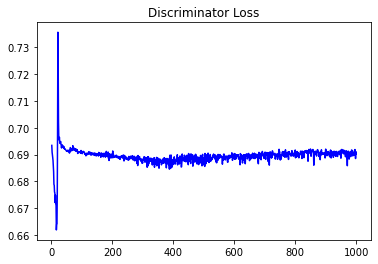

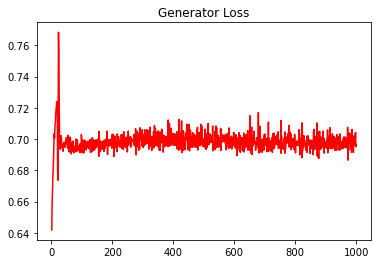

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1263944038815289


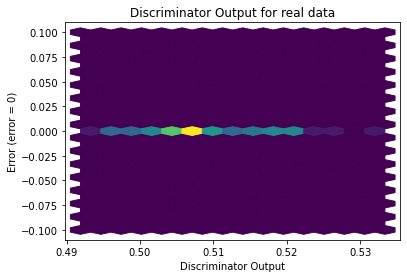

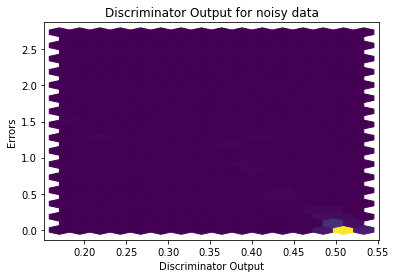

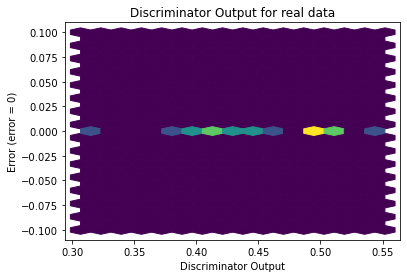

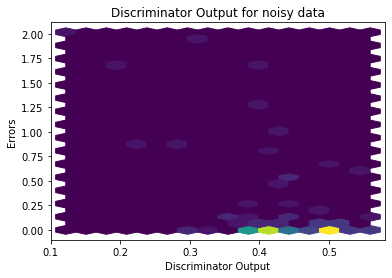

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


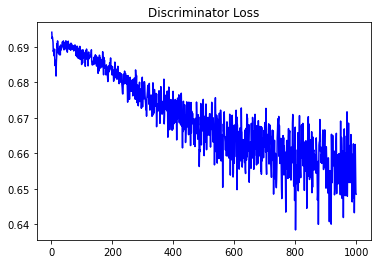

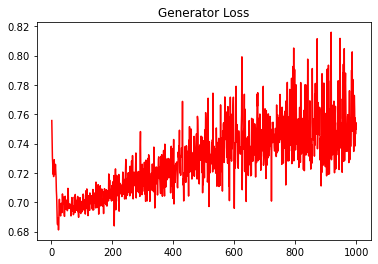

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16439551168865144


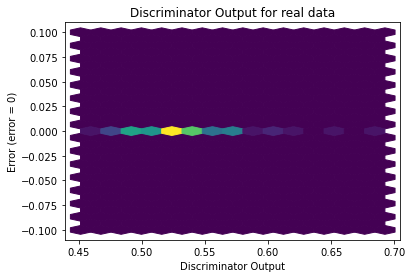

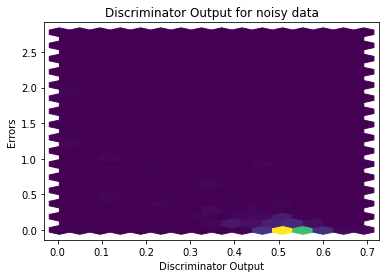

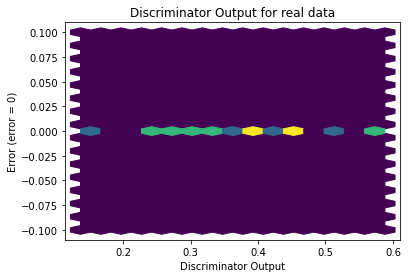

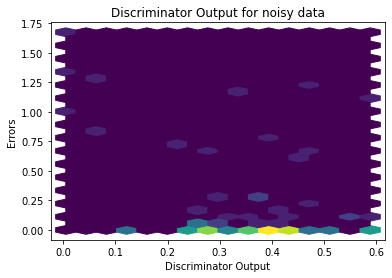

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1564]], requires_grad=True)
